<a href="https://colab.research.google.com/github/invoker-qqwrv/Beida_tensorflow/blob/main/5_11LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1998年。Yann lecun通过共享卷积核减少了网络的参数。

170498071/170498071 [==============================] - 17s 0us/step
Epoch 1/5
1563/1563 [==============================] - 16s 5ms/step - loss: 2.0621 - sparse_categorical_accuracy: 0.2266 - val_loss: 1.9238 - val_sparse_categorical_accuracy: 0.2931
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8351 - sparse_categorical_accuracy: 0.3286 - val_loss: 1.7153 - val_sparse_categorical_accuracy: 0.3792
Epoch 3/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6603 - sparse_categorical_accuracy: 0.3939 - val_loss: 1.5889 - val_sparse_categorical_accuracy: 0.4178
Epoch 4/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5655 - sparse_categorical_accuracy: 0.4293 - val_loss: 1.5189 - val_sparse_categorical_accuracy: 0.4451
Epoch 5/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4932 - sparse_categorical_accuracy: 0.4575 - val_loss: 1.4584 - val_sparse_categorical_accuracy: 0.4753
Model: "le_net5"
_________

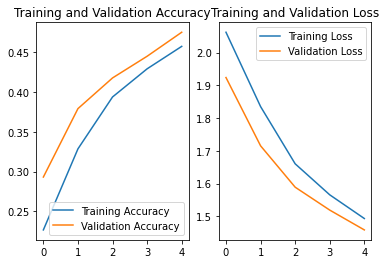

In [1]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras import Model

np.set_printoptions(threshold=np.inf)

cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


class LeNet5(Model):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.c1 = Conv2D(filters=6, kernel_size=(5, 5),
                         activation='sigmoid')
        self.p1 = MaxPool2D(pool_size=(2, 2), strides=2)

        self.c2 = Conv2D(filters=16, kernel_size=(5, 5),
                         activation='sigmoid')
        self.p2 = MaxPool2D(pool_size=(2, 2), strides=2)

        self.flatten = Flatten()
        self.f1 = Dense(120, activation='sigmoid')
        self.f2 = Dense(84, activation='sigmoid')
        self.f3 = Dense(10, activation='softmax')

    def call(self, x):
        x = self.c1(x)
        x = self.p1(x)

        x = self.c2(x)
        x = self.p2(x)

        x = self.flatten(x)
        x = self.f1(x)
        x = self.f2(x)
        y = self.f3(x)
        return y


model = LeNet5()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

checkpoint_save_path = "./checkpoint/LeNet5.ckpt"
if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                    save_weights_only=True,
                    save_best_only=True)

history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1,
                    callbacks=[cp_callback])
model.summary()

# print(model.trainable_variables)
file = open('./weights.txt', 'w')
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

###############################################    show   ###############################################

# 显示训练集和验证集的acc和loss曲线
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
